# **Inferencing of TX-TL only model of MGapt**

In this notebook, we plot the results of the fine tuning of TX-TL model of MGapt for the proposed PURE CRN model.

## Inference results

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import csv

from bioscrape.types import Model
from bioscrape.inference import py_inference
from bioscrape.simulator import py_simulate_model

#Get directory
import os
directory = os.getcwd()

# # Bayesian Inference 
from bioscrape.inference import py_inference

import matplotlib.pyplot as plt
import numpy as np
from bioscrape.types import Model
import time
import pandas as pd
import warnings
from scipy.integrate import odeint
import seaborn as sns
import pandas as pd
import corner
import matplotlib.pyplot as plt

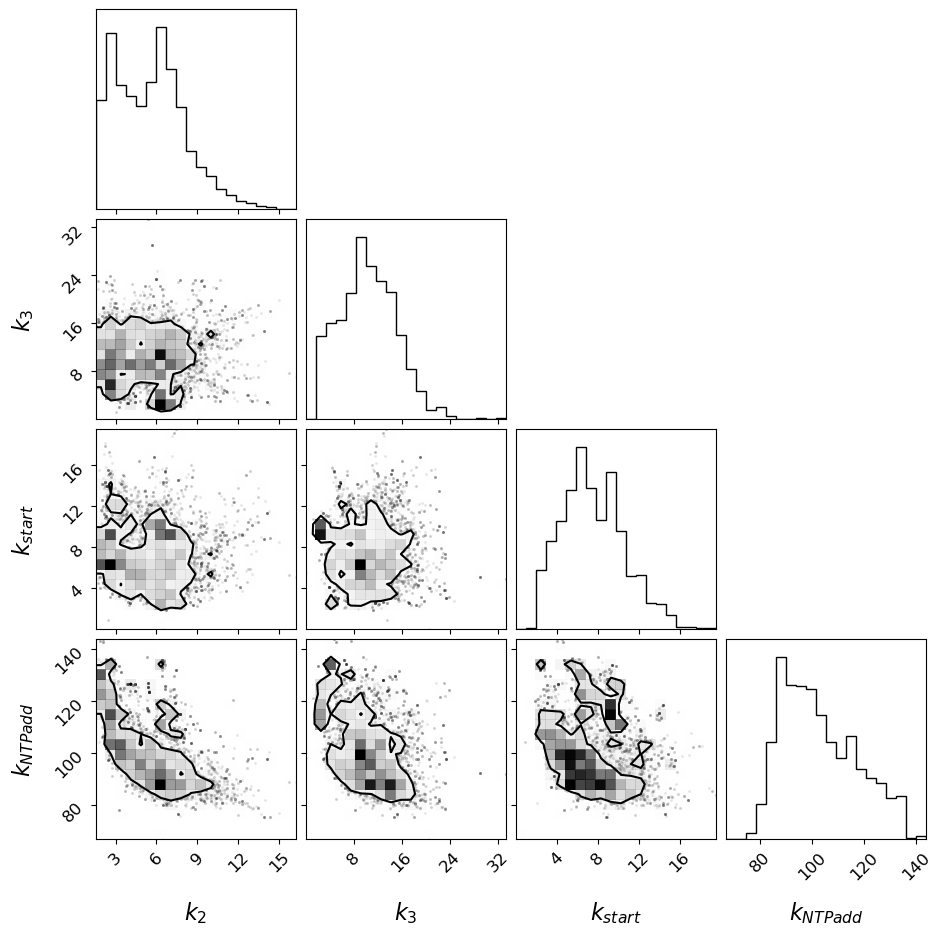

In [2]:
# Custom plots using mcmc_results.csv
labels = ['$k_{2}$', '$k_{3}$',
                      '$k_{start}$','$k_{NTPadd}$',]

samples_mcmc = pd.read_csv('mcmc_results.csv', names = labels,
                           engine = 'python')

fig=corner.corner(samples_mcmc[0:], labels = labels, levels=(0.75,),
             label_kwargs={"fontsize": 16},)
axes = fig.get_axes()
for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=12)
    # ax.set_facecolor('white')
fig.savefig("MGapt_TXwTL_corner_plot_Final.svg")

In [3]:
#Get the mean ends
param_value=samples_mcmc.tail(500).mean()
print(samples_mcmc.tail(500).mean())

$k_{2}$           5.065346
$k_{3}$          10.879168
$k_{start}$       7.644613
$k_{NTPadd}$    102.169664
dtype: float64


## Plotting untuned and tuned parameters

Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
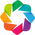

In [4]:
#workhorses
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter
import math
from scipy import stats
import seaborn as sns; sns.set()
import random 
import holoviews as hv
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns; sns.set_theme()
import csv

#Bayesian Inference 
from bioscrape.types import Model
from bioscrape.inference import py_inference
from bioscrape.simulator import py_simulate_model
import time
import warnings
from scipy.integrate import odeint

# Bokeh
import bokeh
import bokeh.io
import bokeh.plotting
bokeh.io.output_notebook()
hv.extension('bokeh')
# Modules needed from Bokeh.
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.models import LinearAxis, Range1d
from sklearn.metrics import r2_score
from bokeh.io import export_svgs, export_svg
from bokeh.models import Title
from bokeh.plotting import gridplot,figure, output_file, show
from bokeh.models.glyphs import Text
from bokeh.transform import factor_cmap
from bokeh.themes import Theme
from bokeh.models import Legend, LegendItem
from bokeh.models import Label
import corner

#Get directory
import os
directory = os.getcwd()

### Definitions

In [5]:
def create_custom_plot(title_text, x_max=8,y_max=2, xname='Time (hours)', yname='MGapt (μM)',height=400, width=500):
    custom_plot = figure(
        toolbar_location='right',
        outline_line_color=None,
        min_border_right=10,
        height=height,
        width=width,)

    custom_plot.title.text = title_text
    custom_plot.xaxis.axis_label = xname
    custom_plot.yaxis.axis_label = yname
    custom_plot.y_range = Range1d(0, y_max)
    custom_plot.x_range = Range1d(0, x_max)
    custom_plot.outline_line_color = None

    # custom_plot.yaxis
    custom_plot.ygrid.visible = False
    custom_plot.yaxis.axis_label_text_font_size = '15pt'
    custom_plot.yaxis.major_label_text_font_size = '15pt'
    custom_plot.yaxis.major_label_text_font = 'Work Sans'
    custom_plot.yaxis.axis_label_standoff = 15
    custom_plot.yaxis.axis_label_text_font_style = 'normal'

    # custom_plot.xaxis
    custom_plot.xgrid.visible = False
    custom_plot.xaxis.axis_label_text_font_size = '15pt'
    custom_plot.xaxis.major_label_text_font_size = '15pt'
    custom_plot.xaxis.major_label_text_font = 'Work Sans'
    custom_plot.xaxis.axis_label_standoff = 15
    custom_plot.xaxis.axis_label_text_font_style = 'normal'

    # custom_plot.title
    custom_plot.title.text_font_size = '18pt'
    custom_plot.title.align = "left"
    custom_plot.title.offset=-70

    return custom_plot

In [6]:
def Circle_wErrorPlot(plot, DF, ind, color='black',cal=False, marker="circle",size=5,):
    
    if cal==True:
        #Data from experiments
        plot.scatter(
            x=DF['Time']/3600, y=calibrateBiotek4(DF['value_ave']),  marker=marker,color= color, size=size, fill_alpha=0.2,
            legend_label= ind)
        # Add error bars
        plot.segment(
            x0=DF['Time']/3600, y0=calibrateBiotek4(DF['error_low']),
            x1=DF['Time']/3600, y1=calibrateBiotek4(DF['error_high']),
            line_width=1, color= color,)
    else:
        plot.scatter(
            x=DF['Time']/3600, y=(DF['value_ave']),  marker=marker,color= color, size=size, fill_alpha=0.2,
            legend_label= ind,)
        # Add error bars
        plot.segment(
            x0=DF['Time']/3600, y0=(DF['error_low']),
            x1=DF['Time']/3600, y1=(DF['error_high']),
            line_width=1, color= color,)
    
    plot.legend.location="top_left"
    plot.legend.click_policy="hide"
    plot.legend.border_line_color = None
    plot.legend.background_fill_color = None
    return(plot)

In [7]:
def Cal_avesNsems(df, DF_neg=None, norm=False, yname='value',xname='Time'):
    num=len(df['well'].unique())
    length=int(len(df)/num)
    coln=array_repeats[0:num]
    arr = df[yname].values.copy()
    arr.resize(num,length)
    DF=pd.DataFrame(arr).T
    
    #Subtract the negative control
    if DF_neg is None:
        pass
    else:
        for n in coln:
            DF[n]=DF[n]-DF_neg['value_ave']
    
    #Normalize data if needed    
    if norm==False:
        pass
    else:
        for n in coln:
            DF[n]=DF[n]/DF[n].max()
            
    DF['value_ave']=DF.iloc[:, coln].mean(axis=1)    
    DF['sem']=stats.sem(DF.iloc[:,coln].T)
    DF[xname]=df[xname].reset_index(drop=True)[0:length]*60
    # Add error bars to the DataFrame
    DF['error_low'] = DF['value_ave'] - DF['sem']
    DF['error_high'] = DF['value_ave'] + DF['sem']
    return(DF)

In [8]:
def Cal_avesNsems2(df, DF_neg=None):
    
    #Calculating the measured MGapt
    total_MGapt=pd.DataFrame(columns=['mRNA0', 'mRNA1','mRNA2'])
    
    if DF_neg==None:
        for name in total_MGapt.columns:
            total_MGapt[name]=df[name]
    else:
        for name in total_MGapt.columns:
            total_MGapt[name]=df[name]-DF_neg['mRNA0']

    total_MGapt['time']=df['time']
    
    
    
    DF=total_MGapt.copy()
    DF['value_ave']=DF.iloc[:, [0,1,2]].mean(axis=1)
    DF['sem']=stats.sem(DF.iloc[:, [0,1,2]].T)
    DF['Time']=total_MGapt['time']

    # Add error bars to the DataFrame
    DF['error_low'] = DF['value_ave'] - DF['sem']
    DF['error_high'] = DF['value_ave'] + DF['sem']
    
    return(DF)

In [9]:
def updateLegend(plot, title="", location='top_left',):
    plot.legend.location=location
    plot.legend.click_policy="hide"
    # Remove the box around the legend
    plot.legend.border_line_color = None
    # Add a legend and set its title
    plot.legend.title = title
    plot.legend.title_text_font_style = "normal"
    plot.legend.label_text_font_size = "12pt"
    return(plot)

### Original

In [10]:
file = '/Data_files/MGapt_mRNA_data_final.csv'
mGapt_Data =  pd.read_csv(directory+ file, delimiter = '\,', names = ['time','mRNA0', 'mRNA1','mRNA2'], engine='python',skiprows = 1)
first_row = mGapt_Data.iloc[0, 1:].mean()  # extract the first row, excluding the 'time' column
mGapt_Data.iloc[:, 1:] -= first_row  # subtract the values in the first row from all other rows, excluding the 'time' column
# Truncate at 4 hours
truncated_data = mGapt_Data[mGapt_Data['time'] <= 3*3600]
# Define timepoints
timepoints =  np.array(truncated_data['time'])

In [11]:
# filename='CRN_PURE_MGaptTXonly'
filename='CRN_PURE_MGaptTXwTL'

#Directory and file for the initial conditions
filename_ic = '/Data_files/PURE_TXTL_initial_values_Final.csv'

with open(directory + filename_ic, mode='r') as infile:
    reader = csv.reader(infile)
    initial_con= {rows[0]:float(rows[1]) for rows in reader}
initial_con['DNA']=.005

# Run model to test
m =Model(sbml_filename = filename+"_updated.xml")
m.set_species(initial_con)

# Simulate model
R0 = py_simulate_model(Model = m, timepoints = timepoints)

C:\Users\zoila\anaconda3\envs\python38\lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [12]:
#A: MGapt measurements and orignal model (not fitted)
DF_MGapt=Cal_avesNsems2(truncated_data)
pTX_i=create_custom_plot('', x_max=3, y_max=25, width=500, height=300)
Circle_wErrorPlot(pTX_i, DF_MGapt, 'Experimental Data', "navy",)
pTX_i.line(R0['time']/3600, R0['MGapt'], legend_label = "BioCRNplyer Model", color = 'magenta', line_width=2) #mRNA
pTX_i.legend.location="top_left"
pTX_i.legend.click_policy="hide"
# Remove the box around the legend
pTX_i.legend.border_line_color = None
bokeh.io.show(pTX_i)

pTX_i.output_backend = "svg"
export_svgs(pTX_i, filename = 'TXwTLFit.svg',width=400, height=250)

['TXwTLFit.svg']

## Fitted

In [13]:
M_fit = Model(sbml_filename = filename+"_updated.xml")
for param, param_value in M_fit.get_parameter_dictionary().items():
    M_fit.set_parameter(param, param_value)
    # print(param,param_value)
M_fit.set_species(initial_con)

timepoints = np.linspace(0, 3*3600, 200)
samples_discard = samples_mcmc.tail(500) #burning the beginning 9500, take last 500

inds = np.random.randint(len(samples_discard), size=5)
print(inds)

[215 175 149 494 413]


In [14]:
#D: MGapt measurements and orignal model (not fitted)
pTX_f=create_custom_plot('', x_max=3, y_max=25, width=500, height=300)
Circle_wErrorPlot(pTX_f, DF_MGapt, 'Experimental Data', "navy",)

for ind in inds:
    sample = samples_discard.iloc[ind]
    for pi, pi_val in zip([ 'k_forward1', 'k_forward2','k_forward3', 'k_forward5',], sample):
        M_fit.set_parameter(pi, pi_val)
    pTX_f.line(timepoints/3600, py_simulate_model(timepoints, Model= M_fit)['MGapt'], 
            color = 'magenta', line_width=2, line_alpha = 0.3, legend_label = "BioCRNplyer Model",)
pTX_f.legend.location="top_left"
pTX_f.legend.click_policy="hide"
# Remove the box around the legend
pTX_f.legend.border_line_color = None
bokeh.io.show(pTX_f)

pTX_f.output_backend = "svg"
export_svgs(pTX_f, filename = 'FinalFit.svg',width=400, height=250)

C:\Users\zoila\anaconda3\envs\python38\lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\zoila\anaconda3\envs\python38\lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\zoila\anaconda3\envs\python38\lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\zoila\anaconda3\envs\python38\lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get qu

['FinalFit.svg']

# Computing environment

In [15]:
%load_ext watermark
%watermark -v -p bioscrape,bokeh,panel,jupyterlab,biocrnpyler

Python implementation: CPython
Python version       : 3.8.17
IPython version      : 8.12.2

bioscrape  : 1.2.1
bokeh      : 2.4.0
panel      : 0.13.1
jupyterlab : 3.6.5
biocrnpyler: 1.1.1

